In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import itertools

%matplotlib inline

In [3]:
class ellipse:
    def __init__(self,s):
        ellipse_info = s.split(" ")
        self.major_axis = float(ellipse_info[0])
        self.minor_axis = float(ellipse_info[1])
        self.angle = float(ellipse_info[2])
        self.cx = float(ellipse_info[3])
        self.cy = float(ellipse_info[4])
        focus = np.sqrt(np.square(self.major_axis)-np.square(self.minor_axis))
        #print focus
        #print self.cx-np.cos(self.angle)*focus
        #print self.cy-np.sin(self.angle)*focus
        #print
        self.foci = np.array([(self.cx-np.cos(self.angle)*focus,self.cy-np.sin(self.angle)*focus),(self.cx+np.cos(self.angle)*focus,self.cy+np.sin(self.angle)*focus)])
        self.foci_dist = np.sqrt(np.square(focus)+np.square(self.minor_axis))
        self.area = np.pi*self.minor_axis*self.major_axis
    def pixel_score(self, xy):
        if (np.linalg.norm([xy[0]-self.foci[0][0],xy[1]-self.foci[0][1]]) + np.linalg.norm([xy[0]-self.foci[1][0],xy[1]-self.foci[1][1]])) <= 2*self.foci_dist:
            #print "For pixel "
            #print xy
            #print "Foci are "
            #print self.foci
            return 1
        return 0
    def score(self, winx, winy, half_width = 16):
        intersect = sum(map(self.pixel_score,itertools.product(xrange(winx-half_width,winx+half_width+1),xrange(winy-half_width,winy+half_width+1))))
        union = np.square(half_width*2+1) + self.area - intersect
        #print intersect/union
        return [intersect,union]

[4001, 21907.963267948966]


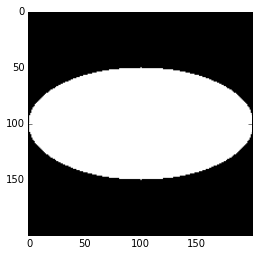

In [4]:
e = ellipse("100 50 0 100 100")
im = np.zeros([200,200])
def func(x):
    im[x[0],x[1]] = 255*e.pixel_score(x)
map(func,itertools.product(xrange(200),xrange(200)))
plt.imshow(im.T,cmap="gray")
print e.score(50,50,half_width=50)